In [ ]:
!wget https://tufts.box.com/shared/static/325sgkodnq30ez61ugazvctif6r24hsu.csv -O daf.csv -q

# Textual Feature Extraction using Traditional Machine Learning
In this workshop, we are going to learn how to conduct feature extraction on text using `sci-kit learn`.

First, what is feature extraction? **Feature extraction or vectorization is any process by which we can convert raw data into a format that can be understood by a computer.** Text is not consistant in format, meaning that, unlike an image, there is no single format that all documents come in. Usually, each sentence is a different length and could be made up of specialized terminology. As a result, feature extraction allows us to standardize textual inputs so that they can be used for a variety of tasks. For example, in the `Traditional Topic Modeling in SKLearn` workshop, I use these features to extract topics from a text.

In this notebook, we'll look at two different algorithms that are commonly used for textual feature extraction:
*   Count Vectorization
*   Term frequency - inverse document frequency (TF-IDF) vectorization


But before we can look at these, we'll look at the simplest type of feature extraction: the so-called 'bag of words' approach.


## Imports and data

For this example, we'll be using Edward Gibbon's *Decline and Fall of the Roman Empire*. This text is really long so it will be a good example of a lot of the problems that pop up in NLP.

In [ ]:
import pandas as pd

daf = pd.read_csv('daf.csv')[['title','text']]
daf.head()

,title,text
0,The Extent Of The Empire In The Age Of The Ant...,Introduction. The Extent And Military Fo...
1,The Extent Of The Empire In The Age Of The Ant...,"It was an ancient tradition, that when the Cap..."
2,The Extent Of The Empire In The Age Of The Ant...,The camp of a Roman legion presented the appea...
3,The Internal Prosperity In The Age Of The Anto...,Of The Union And Internal Prosperity Of The Ro...
4,The Internal Prosperity In The Age Of The Anto...,Till the privileges of Romans had been progres...


In [ ]:
text = ' '.join(daf.text).lower()
text[:1000]

'introduction.       the extent and military force of the empire in the age of the      antonines.  in the second century of the christian æra, the empire of rome comprehended the fairest part of the earth, and the most civilized portion of mankind. the frontiers of that extensive monarchy were guarded by ancient renown and disciplined valor. the gentle but powerful influence of laws and manners had gradually cemented the union of the provinces. their peaceful inhabitants enjoyed and abused the advantages of wealth and luxury. the image of a free constitution was preserved with decent reverence: the roman senate appeared to possess the sovereign authority, and devolved on the emperors all the executive powers of government. during a happy period of more than fourscore years, the public administration was conducted by the virtue and abilities of nerva, trajan, hadrian, and the two antonines. it is the design of this, and of the two succeeding chapters, to describe the prosperous conditi

## Bag of Words
The Bag of Words approach consists simply in counting individual word occurence. But walking thourgh this process will teach us about NLP fundementals that carry over into the more advanced methods.

### Tokenization

Before we can count words, we need to decide what consistutes a word and then split our text up by word. This process is called **tokenization** and is very important at all levels of NLP. There are many different types of tokenizers, but for this example we'll use the simplest one from the Natural Language Toolkit (`nltk`).

In [ ]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

tokens = word_tokenize(daf.iloc[1].text)
tokens[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['It',
 'was',
 'an',
 'ancient',
 'tradition',
 ',',
 'that',
 'when',
 'the',
 'Capitol']

In [ ]:
words = [word for word in word_tokenize(text) if word.isalpha()]
# word.isalpha returns True is a word is made up of only alphabet characters and not numbers or spaces
words[:10]

['introduction',
 'the',
 'extent',
 'and',
 'military',
 'force',
 'of',
 'the',
 'empire',
 'in']

### Counting words
Now that we've split the text into words, we can count them. I'll show three ways to do it, but they will all return the same result. I only do so to show you how easy it is to do this task in Python.

Each one follwos the same algorithm:

1.   Create an empty data strcuture to hold the frequencies
2.   Loop through all words
3.   If we see a word that is in in our data structure already, increment the associated frequency by 1
4.   If we see a word that is NOT in our data structure already, add the word and set its value to 1




In [ ]:
# longest version
counts = {} # data structure
for word in words: # looping through all words
  if word in counts: # if the word is already in our data structure
    counts[word] += 1 # increment by 1
  else:
    counts[word] = 1 # set as 1

counts = sorted(counts.items(), key=lambda x: x[1], reverse=True) # dictionary sorting
counts[:10]

[('the', 35184),
 ('of', 23474),
 ('and', 13250),
 ('to', 6397),
 ('a', 5256),
 ('his', 4481),
 ('in', 4013),
 ('was', 3962),
 ('by', 3578),
 ('their', 3009)]

In [ ]:
# shorter version
import collections
counts = collections.defaultdict(int) # data structure
for word in words: # looping through all words
  counts[word] += 1 # increment by 1

counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
counts[:10]

[('the', 35184),
 ('of', 23474),
 ('and', 13250),
 ('to', 6397),
 ('a', 5256),
 ('his', 4481),
 ('in', 4013),
 ('was', 3962),
 ('by', 3578),
 ('their', 3009)]

In [ ]:
# shortest version
counts = collections.Counter(words)
counts.most_common(10)

[('the', 35184),
 ('of', 23474),
 ('and', 13250),
 ('to', 6397),
 ('a', 5256),
 ('his', 4481),
 ('in', 4013),
 ('was', 3962),
 ('by', 3578),
 ('their', 3009)]

#### Removing stop words

As you see above, the most common words in this text are not very expressive of the content of the text. Rather they are just the most common words in the English language. These words are sometimes called 'stop words' and, when using word frequency, it is common to remove them.

For this example, we'll use `nltk`'s stop words list. See below for the whole list.

In [ ]:
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# an example
[word for word in word_tokenize(daf.iloc[0].text.lower()) if word.isalpha() and word not in stopwords.words('english')][:10]

['introduction',
 'extent',
 'military',
 'force',
 'empire',
 'age',
 'antonines',
 'second',
 'century',
 'christian']

#### Counting words without stop words

In [ ]:
import collections
counts = collections.defaultdict(int) # data structure

stop_words = stopwords.words('english') # list of stop words
for word in words: # looping through all words
  if word not in stop_words: # if the word is not in stop words list
    counts[word] += 1 # increment by 1

counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
counts[:10]

[('might', 578),
 ('empire', 569),
 ('emperor', 558),
 ('roman', 547),
 ('first', 483),
 ('two', 396),
 ('people', 390),
 ('rome', 375),
 ('every', 369),
 ('without', 368)]

## Count Vectorization

The bag of words model of feature extraction is straightforward and easy to understand but it is limited. We would prefer a single class that could do all of the above steps in a efficient and fast way. Thankfully, `sci-kit learn` provides this in the `CounterVectorizer`.

`CountVectorizer` will take each document in our corpus (each chapter, before we were just joining them all together) and convert it into an array of ones and zeros. See the example below.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() # initialize the class

# taken from: https://scikit-learn.org/stable/modules/feature_extraction.html#common-vectorizer-usage
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    ]

X = vectorizer.fit_transform(corpus)
X.shape # number of documents by number of unique words

(4, 9)

In [ ]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,1,0,1,0,2,1,0,1
2,1,0,0,0,1,0,1,1,0
3,0,1,1,1,0,0,1,0,1


As we see above, each unique word in the corpus is made into a column. Within each cell, then, the count of how many times that word occurs in that document is recorded. This makes it so that each sentence now has a consistent shape and it's one that's a bit more verbose than just a single number, while at the same time representing the same information as the bag of words model. See below how we can apply this to the large text.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(daf.text)
X.shape # number of documents by number of unique words

(296, 13035)

In [ ]:
# most of our entries are 0
# we call this a 'sparse' matrix
cv = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
cv

,1452,1780,1787,1836,27,321,327,336,_adoration_,_afer_,...,òevery,òi,òis,òlast,òo,òone,òthe,òthere,òthose,òwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# we can recreate the same results as above but now on the basis of each document
# results vary slightly because of how sk learn tokenizes their text
sorted(cv.sum(axis=0).to_dict().items(), key=lambda x: x[1], reverse=True)[:10]

[('empire', 579),
 ('might', 578),
 ('emperor', 561),
 ('roman', 547),
 ('first', 490),
 ('two', 409),
 ('people', 393),
 ('rome', 384),
 ('every', 369),
 ('without', 368)]

## Term frequency - inverse document frequency (TF-IDF)

A final alteration we can make to this counter is **normalizing** the counts by the number of times that word occurs. **Normalization** is any mathimatical transformation we make to a number that will make it more normal or regular.
In this case, someone could argue: "'might' occurs so many times not because it's important but rather because it is a word that has several meanings and is therefore used more often than words with only one meaning."

That's where TF-IDF comes in. This normalization technique is the product of two statistics: term frequency and inverse document frequency.

*   The first is a count of how many times a term occurs in a document (which is what we have in the `CounterVectorizer` above) divded by the total number of words in the document. Given a term $t$ and a document $d$, term frequency $\mathrm{tf}(t,d)$  is defined as: $\mathrm {tf} (t,d)={\frac {f_{t,d}}{\sum _{t'\in d}{f_{t',d}}}}$.
*   The second responds directly to the objection above. It is a measure of the importance of the term in the context of the rest of the documents, determining whether this term is rare or common. It is obtained by dividing the total number of documents $N$ by the number of documents containing the term $|\{d \in D: t \in d\}|$, where $d$ is a document in our documents $D$ and $t$ is any term in document $d$. This inverse document frequency is defined as $\mathrm{idf}(t, D) = \frac{N}{|\{d \in D: t \in d\}|}$.

Thus TF-IDF takes the form: $\mathrm{tfidf} = \mathrm {tf} \cdot \mathrm {idf}$. In practice, log normalization (taking the natural log) is applied to both parts of TF-IDF. Below we'll see how to use `sci-kit learn` to implement TF-IDF.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(daf.text) # this is called the document-term matrix
X.shape # number of documents by number of unique words

(296, 13035)

In [ ]:
# now all of the zeros are decimals
tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf

,1452,1780,1787,1836,27,321,327,336,_adoration_,_afer_,...,òevery,òi,òis,òlast,òo,òone,òthe,òthere,òthose,òwe
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
292,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
293,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
294,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# a single column
# this single column represents the tf-idf score for the word 'Rome' in each chapter
tfidf['rome']

0      0.060913
1      0.020159
2      0.017816
3      0.071124
4      0.051666
         ...   
291    0.101778
292    0.081006
293    0.117936
294    0.104346
295    0.119457
Name: rome, Length: 296, dtype: float64

## What can you do with TF-IDF?

There are many applications for TF-IDF (be sure to check out the `Traditional Topic Modeling in SKLearn` workshop). Here we'll do some document comparision. Because we now have a 13035 long vector representing each chapter, we can compare them to each other to find chapters that have similar word usage.

If we have two vectors, we can compare them using the dot product. For the two vectors $A = \begin{bmatrix} a_1 & a_2 & a_3 \end{bmatrix}$ and $B = \begin{bmatrix} b_1 & b_2 & b_3 \end{bmatrix}$, $A \cdot B = (a_1)(b_1) + (a_2)(b_2) + (a_3)(b_3)$. If we then scale this value by the product of the magnitudes of $A$ and $B$, we are guaranteed to get back a number that is betweeen -1 and 1. This is often called **cosine similarity** and is used frequently to compare vectors in NLP. A score of exactly 1 means that the two vectors are the same, whereas a score of -1 means that the vectors have the same magnitude but are pointing in opposite directions. See the implementation below.

In [ ]:
import numpy as np

ch1 = X.toarray()[0] # chapter 1
ch2 = X.toarray()[1] # chapter 2

# cosine similarity
np.dot(ch1, ch2) / (np.linalg.norm(ch1) * np.linalg.norm(ch2)) # np.linalg.norm returns the magnitude of a vector

0.2157683155352871

In [ ]:
def docsim(id1, id2):
    ch1 = X.toarray()[id1]
    ch2 = X.toarray()[id2]
    return np.dot(ch1, ch2) / (np.linalg.norm(ch1) * np.linalg.norm(ch2))

In [ ]:
for i in range(len(daf[:50])):
    print(f'Chapter 1 compared with Chapter {i+1}: {docsim(0, i)}')

Chapter 1 compared with Chapter 1: 1.0
Chapter 1 compared with Chapter 2: 0.2157683155352871
Chapter 1 compared with Chapter 3: 0.21812691957335334
Chapter 1 compared with Chapter 4: 0.12850663946427368
Chapter 1 compared with Chapter 5: 0.10429450807805568
Chapter 1 compared with Chapter 6: 0.11569936141360543
Chapter 1 compared with Chapter 7: 0.15158148604929128
Chapter 1 compared with Chapter 8: 0.23798889530192674
Chapter 1 compared with Chapter 9: 0.25942604204282155
Chapter 1 compared with Chapter 10: 0.10216516493597419
Chapter 1 compared with Chapter 11: 0.12315185810886659
Chapter 1 compared with Chapter 12: 0.15724906825152746
Chapter 1 compared with Chapter 13: 0.16161628987642954
Chapter 1 compared with Chapter 14: 0.16589626643737831
Chapter 1 compared with Chapter 15: 0.14201355553923192
Chapter 1 compared with Chapter 16: 0.1515978908703342
Chapter 1 compared with Chapter 17: 0.20128261783139945
Chapter 1 compared with Chapter 18: 0.16211633506181589
Chapter 1 compared 

In [ ]:
import matplotlib.pyplot as plt

# this will take some time (~1 min)
ch1_sims = [docsim(0,i) for i in range(1, len(daf[1:])+1)] # remove the first chapter

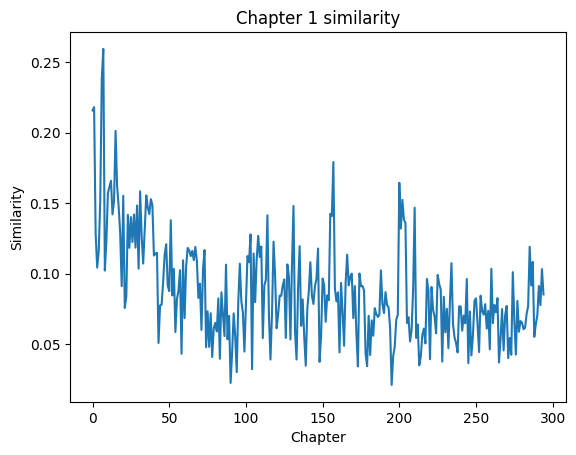

In [ ]:
# plotting
# similarity goes down over the whole book, as we might expect
plt.plot(ch1_sims)
plt.title('Chapter 1 similarity')
plt.xlabel('Chapter')
plt.ylabel('Similarity')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
x = np.array(range(1, len(daf[1:])+1))
y = np.array(ch1_sims)
X = x[:, np.newaxis] # add bias term
reg = LinearRegression().fit(X, ch1_sims)
r = reg.score(X, y)
m = reg.coef_[0]
b = reg.intercept_

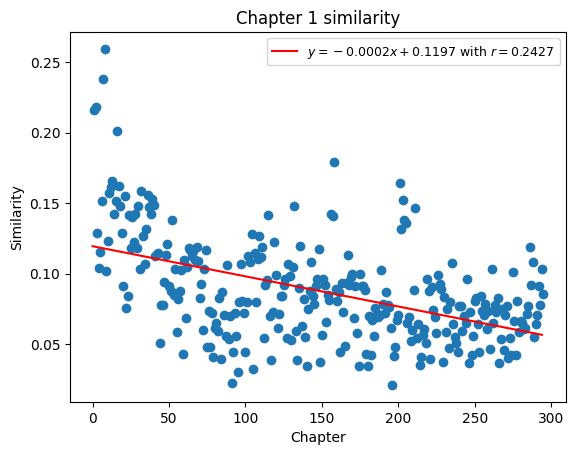

In [ ]:
# plot with regression line
plt.scatter(x, ch1_sims)
plt.plot(m*X+b, label=f'$y={round(m,4)}x + {round(b,4)}$ with $r = {round(r,4)}$', color='red')
plt.title('Chapter 1 similarity')
plt.xlabel('Chapter')
plt.ylabel('Similarity')
plt.legend(fontsize=9)
plt.show()

The above plot shows us that as we read through the text chronologically, we see content that becomes more and more different from the first chapter. Specifically, the word usage throughout the rest of the book different significantly from the word usage of the first chapter. This plot also helps us identitfy places where this trend may not be completely true. For instance, we see a cluster in the 150s and 200s of chapters that have a higher similarity score than the chapters around them. We could select this points and investigate further.

All of this would not have been possible without vectorizing our text. As a result, feature extraction is usually the first step in any NLP model, like we've made above. There are more advanced ways of doing it, but TF-IDF has stood the text of time and is still used today.